# 1 The objective of this notebook is to analyze the data from the dataset and set up a reference metric with a baseline mode

## Data Atributes/Description:

Attributes:
 * id : unique identifier for candidate (numeric)

 * job_title : job title for candidate (text)

 * location : geographical location for candidate (text)

 * connections: number of connections candidate has, 500+ means over 500 (text)

Output (desired target):
 * fit - how fit the candidate is for the role? (numeric, probability between 0-1)

Keywords: “Aspiring human resources” or “seeking human resources”





In [160]:
#---------Importing libraries---------#

#---Data analysis---#
import pandas as pd

#----math---#
import numpy as np
from numpy.linalg import norm


#---Data visualization---#
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


#---NLP---#
import re
import string
from collections import Counter

import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#---nltkDownloads---# https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#from sentence_transformers import SentenceTransformer


#---utils---#
import os
from pathlib import Path




#ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\joao-
[nltk_data]     lemos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\joao-
[nltk_data]     lemos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\joao-
[nltk_data]     lemos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\joao-
[nltk_data]     lemos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joao-lemos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to C:\Users\joao-
[nltk_data]     lemos\AppData\Roaming\nltk_data...
[nltk_data]   Packa

In [161]:
#spacy
#lemmatization with spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

## Step 1: Data Loading and Inspection

Load the dataset into a pandas DataFrame.

Check the dimensions of the dataset (number of rows and columns).

Examine the first few rows of the dataset to get an initial understanding of the data.

Check for any missing values in the dataset.

In [162]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw', 'potential-talents - Aspiring human resources - seeking human resources.csv')

df = pd.read_csv(raw_data_path)

df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [163]:
df.tail()

,id,job_title,location,connection,fit
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN
103,104,Director Of Administration at Excellence Logging,"Katy, Texas",500+,NaN


In [164]:
df.dtypes

id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object

In [165]:
#onyl object cols
df[df.columns[df.dtypes == 'object']].describe()

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,500+
freq,7,12,44


In [166]:
df.describe(include=object)

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,500+
freq,7,12,44


In [167]:
#checking for missing values
df.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

## Step 2: Data Cleaning and Preprocessing

Handle missing values, if any, by either imputing them or removing rows/columns with missing values, depending on the situation.

Convert categorical variables into appropriate data types (e.g., convert 'month' and 'contact' to categorical data type).

Encode binary categorical variables ('default', 'housing', 'loan', and 'y') into numeric format (0 and 1) for modeling purposes.

In [168]:
# drop the fit row
df.drop(columns=['fit'], inplace=True)

df.head()

,id,job_title,location,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+


In [169]:
#setting the index to be the id
df.set_index('id', inplace=True)

In [170]:
#checking for duplicated rows
df.duplicated().sum()

51

In [171]:
#drop duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(53, 3)

In [172]:
#checking for na or null values
df.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

In [173]:
df_v1 = df
df_clean = df.copy()


# Text Preprocessing

Col - job tittles

In [174]:
#text preprocessing function
def text_cleaner(text):
    #lowercase
    text = text.lower() #not required in BERT
    #remove special characters and digits
    text = re.sub(r"(\d|\W)+"," ", text) 
    #remove single characters from the start, from the middle and from the end of the text
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)#not required in BERT
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)#not required in BERT
    text = re.sub(r'\s+[a-zA-Z]$', ' ', text)#not required in BERT
    #removing numbers
    text = re.sub(r'\d+', '', text)#not required in BERT

    #remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    text_tokens = nltk.word_tokenize(text)
    text = [word for word in text_tokens if word not in stop_words]
    
    #lemmatization with spacy
    text = nlp(' '.join(text))
    text = [word.lemma_ for word in text] #not required in BERT
    text = ' '.join(text)
    #remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    



    return text

## cleaning time!

In [175]:
df_clean['job_title'] = df_clean['job_title'].apply(lambda x: text_cleaner(x))
df_clean['location'] = df_clean['location'].apply(lambda x: text_cleaner(x))
df_clean['connection'] = df['connection'].str.replace(r'\+', '', regex=True)
df_clean.head(15)

,job_title,location,connection
id,,,
1,bauer college business graduate magna cum laud...,houston texas,85
2,native english teacher epik english program korea,kanada,500
3,aspire human resource professional,raleigh durham north carolina area,44
4,people development coordinator ryan,denton texas,500
5,advisory board member celal bayar university,zmir türkiye,500
6,aspire human resource specialist,great new york city area,1
7,student humber college aspire human resource g...,kanada,61
8,hr senior specialist,san francisco bay area,500
10,seek human resource hris generalist position,great philadelphia area,500


In [176]:
# Creating an extra column with all columns combined
df_clean['all_text'] = df_clean['job_title'] + ' ' + \
    df_clean['location'] + ' ' + df_clean['connection'] 

df_clean.head()

,job_title,location,connection,all_text
id,,,,
1,bauer college business graduate magna cum laud...,houston texas,85,bauer college business graduate magna cum laud...
2,native english teacher epik english program korea,kanada,500,native english teacher epik english program ko...
3,aspire human resource professional,raleigh durham north carolina area,44,aspire human resource professional raleigh dur...
4,people development coordinator ryan,denton texas,500,people development coordinator ryan denton tex...
5,advisory board member celal bayar university,zmir türkiye,500,advisory board member celal bayar university z...


In [177]:
#example:
df_clean['all_text'].iloc[0]

'bauer college business graduate magna cum laude aspire human resource professional houston texas 85'

In [178]:
# visualizing the differences that cleaning made
print(df_clean['job_title'].iloc[0])
print(df['job_title'].iloc[0])

bauer college business graduate magna cum laude aspire human resource professional
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional


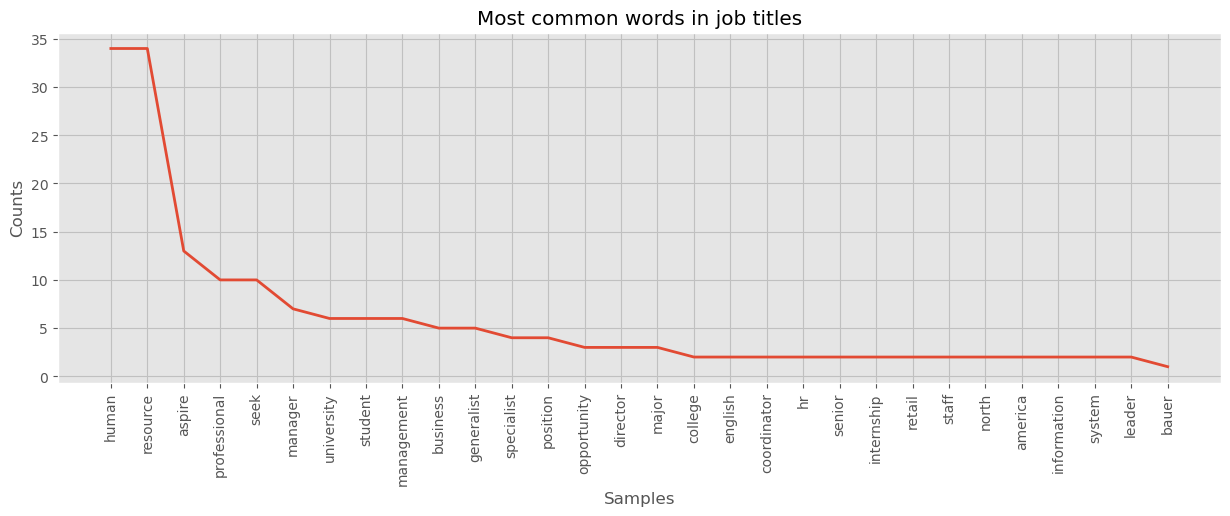

In [179]:
#most commum words in job tittle and in all text

fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
words = list(df_clean['job_title'].values)
words = ' '.join(words).split()
FreqDist = nltk.FreqDist(words)
plt.title('Most common words in job titles')
FreqDist.plot(30, cumulative=False);


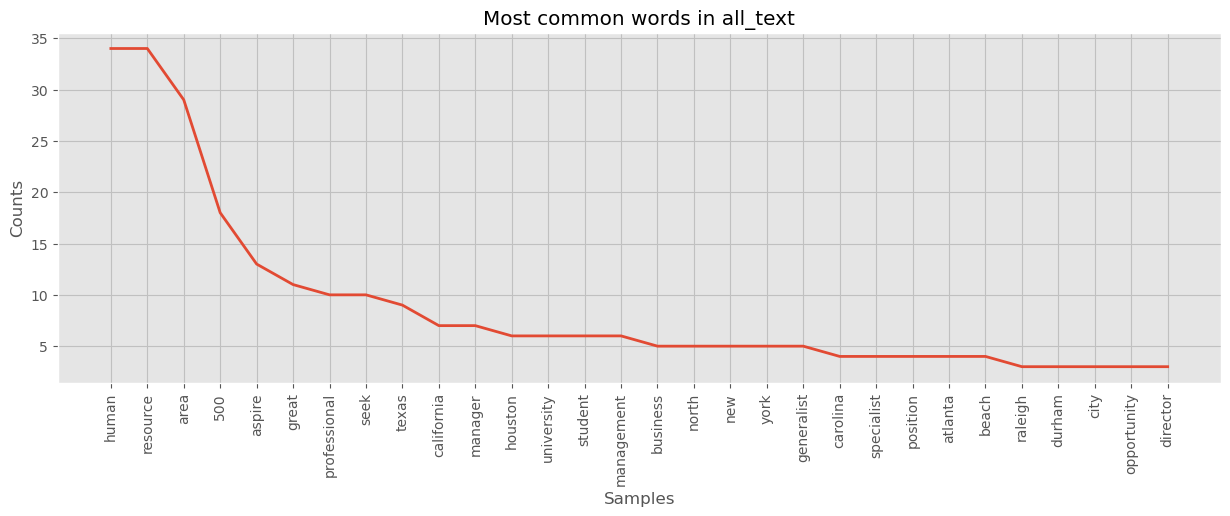

In [180]:
#most commum words in job tittle and in all_text

fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
words = list(df_clean['all_text'].values)
words = ' '.join(words).split()
FreqDist = nltk.FreqDist(words)
plt.title('Most common words in all_text')
FreqDist.plot(30, cumulative=False);

# Vector representation of job titles, location and connections ( per row), cossine similarity on key phrases

Testing

In [181]:
key_sent_1 = 'aspiring human resources'
key_sent_2 = 'seeking human resources'
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df_clean['job_title'].to_list()+[key_sent_1, key_sent_2])
sparse_matrix = X.toarray()
print(sparse_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [182]:
X.toarray().shape

(55, 385)

In [183]:
#transforming the key sentences into embeddings defined by the vectorizer
key_sent_1_emb = vectorizer.transform([key_sent_1])
key_sent_2_emb = vectorizer.transform([key_sent_2])
arr_key1 = key_sent_1_emb.toarray()[0]
arr_key2 = key_sent_2_emb.toarray()[0]
print(arr_key1)
print(arr_key2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# similarity between job titles and key phrases, based on the exact match of the words.

## First approach: Sentences siMilarity with BAG OF WORDS

Creating a corpus of documents, key phrases, embedding them and calculating the similarity between them
to return the most similar key phrases to the job title, as the preprocessed df plus the similarity score 

In [184]:
#sents to embeddings and cosine similarity scores to df
def a_add_cosine_similarity_col_to_df(df, col_with_corpus:str, model, key_sent_1, key_sent_2):
    """"
    This function takes a corpus of sentences and a model and returns 
    a dataframe with the embeddings and the cosine similarity scores
    between the key sentences and the rest of the sentences in the corpus.
    ----------------------------------------------------------------------------------
    Inputs:
    df: dataframe
    col_with_corpus: column name of the dataframe with the corpus of sentences
    model: vectorizer
    key_sent_1: a sentence to be compared with
    key_sent_2: another sentence to be compared with


    ----------------------------------------------------------------------------------
    Output:
    df_embeddings: dataframe with the embeddings and the cosine similarity scores
    """

    #assert for inputs
    assert isinstance(df, pd.DataFrame), 'should be a dataframe'
    assert isinstance(col_with_corpus, str), 'should be a string'
    
    assert isinstance(key_sent_1, str), 'should be a string'
    assert isinstance(key_sent_2, str), 'should be a string'




    #copy the df and get the id column, reset the index for merging later with embeddings
    df = df.copy()
    original_id = df.index
    df = df.reset_index(drop=True)

    #clean df corpus
    df[col_with_corpus] = df[col_with_corpus].apply(lambda x: text_cleaner(x))
    #clean key sentences
    key_sent_1 = text_cleaner(key_sent_1)
    key_sent_2 = text_cleaner(key_sent_2)
    #fitting the model to the corpus
    embeddings = model.fit_transform(df[col_with_corpus]) #matrix of embeddings
    embeddings = embeddings.toarray() #convert to array
    #model is fitted with all the vocabulary to create fixed length embeddings,
    #now we take out our key sents
    #key sentences  embeddings defined by the vectorizer
    #define them then take them out
    key1_emb = model.transform([key_sent_1]).toarray()[0] 
    key2_emb = model.transform([key_sent_2]).toarray()[0]

    #creating a dataframe with the embeddings
    df_embeddings = pd.DataFrame(embeddings, columns=model.get_feature_names_out()) #convert to dataframe



    #calculating cosine similarity between the key sentences and the rest of the sentences
    # as we are using apply, we need to reshape the array
    df_embeddings[key_sent_1] = cosine_similarity(embeddings, key1_emb.reshape(1, -1))
    df_embeddings[key_sent_2] = cosine_similarity(embeddings, key2_emb.reshape(1, -1))


    df = df.merge(df_embeddings[[key_sent_1, key_sent_2]], left_index=True, right_index=True)
    df = df.set_index(original_id)
    df['key_similarity_mean'] = df[[key_sent_1, key_sent_2]].mean(axis=1)
         

    #return the df with the cosine similarity columns
    
    return df.sort_values(by='key_similarity_mean', ascending=False)

In [185]:
model = CountVectorizer(ngram_range=(1, 2))
df_test = a_add_cosine_similarity_col_to_df(df_v1, 'job_title', model,\
     'aspiring human resources', 'seeking human resources')

df_test.head()

,job_title,location,connection,aspire human resource,seek human resource,key_similarity_mean
id,,,,,,
73,aspire human resource manager seek internship ...,"Houston, Texas Area",7,0.780720,0.683130,0.731925
28,seek human resource opportunity,"Chicago, Illinois",390,0.507093,0.845154,0.676123
3,aspire human resource professional,"Raleigh-Durham, North Carolina Area",44,0.845154,0.507093,0.676123
6,aspire human resource specialist,Greater New York City Area,1,0.845154,0.507093,0.676123
99,seek human resource position,"Las Vegas, Nevada Area",48,0.507093,0.845154,0.676123


In [186]:
df_test[['job_title', 'aspire human resource']].iloc[30:40]

,job_title,aspire human resource
id,,
70,retire army national guard recruiter office ma...,0.29277
77,human resource conflict management policy proc...,0.29277
92,seek employment opportunity within customer se...,0.00000
2,native english teacher epik english program korea,0.00000
11,student chapman university,0.00000
98,student,0.00000
5,advisory board member celal bayar university,0.00000
8,hr senior specialist,0.00000
95,student westfield state university,0.00000


## Second approach: Sentences siMilarity with TfidfVectorizer

In [187]:
model = TfidfVectorizer(ngram_range=(1, 2))
a_add_cosine_similarity_col_to_df(df_v1, 'job_title', model,\
     'aspiring human resources', 'seeking human resources').head(10)

,job_title,location,connection,aspire human resource,seek human resource,key_similarity_mean
id,,,,,,
97,aspire human resource professional,"Kokomo, Indiana Area",71,0.741575,0.242187,0.491881
3,aspire human resource professional,"Raleigh-Durham, North Carolina Area",44,0.741575,0.242187,0.491881
99,seek human resource position,"Las Vegas, Nevada Area",48,0.224067,0.686093,0.455080
28,seek human resource opportunity,"Chicago, Illinois",390,0.220668,0.675682,0.448175
73,aspire human resource manager seek internship ...,"Houston, Texas Area",7,0.508880,0.362648,0.435764
6,aspire human resource specialist,Greater New York City Area,1,0.632697,0.206629,0.419663
74,human resource professional,Greater Boston Area,16,0.344790,0.298706,0.321748
27,aspire human resource management student seek ...,"Houston, Texas Area",500+,0.374733,0.245337,0.310035
10,seek human resource hris generalist position,Greater Philadelphia Area,500+,0.145447,0.445357,0.295402


We can see that the similarity score that is the highest is the one that is the most similar to the job title, when using the TfidfVectorizer in comparison to the BOW approach.

# [DEEP LEARNING] similarity between job titles and key phrases, based on the meaning of the words. Similar words will have close vectors/ embeddings.
This means the context of the words is taken into account, in a sentence.

## Third approach: Sentences siMilarity with Word2Vec

After training the neural network:
The each value in the vector of a word is related to one of the 300 hundred dimensions/features. For example, a word boy will be having a high score with a feature called gender.


IN cBOW, the context is the input and the word is the output.
The neural network is trained to predict the word given the context, and the features are given in a hidden layer, called by a windonw size. For example, google model word2vec uses a window size of 300, which means that the model will look at 300 words before and after the word to predict the word. 

 In Skip-gram, the word is the input and the context is the output.
The neural network is trained to predict the context given the word, and the features are given in a hidden layer, called by a windonw size. means that the model will look at 300 words before and after the word to predict the word.

 In average word2vec, the word vectors are averaged for each word in a document. This is the simplest approach to document embedding.

In [190]:
#transform series into a list of lists of tokens ( each word is a token, each sentence is a list of tokens)
def tokenize_series(series):
    corpus = []
    for sent in series:
        corpus.append(sent.split())
    return corpus
    

In [191]:
#word to vec model
from gensim.models import Word2Vec
#clean col
df_v2 = df_v1.copy()
df_v2['job_title'] = df_v2['job_title'].apply(lambda x: text_cleaner(x))
sentences = tokenize_series(df_v2['job_title'].tolist() + ['aspiring human resources', 'seeking human resources'])

model = Word2Vec(sentences, min_count=1)
#the model embbeded all the words in the corpus.

model.wv.index_to_key 





['human',
 'resource',
 'aspire',
 'professional',
 'seek',
 'manager',
 'student',
 'university',
 'management',
 'business',
 'generalist',
 'position',
 'specialist',
 'director',
 'major',
 'opportunity',
 'staff',
 'retail',
 'north',
 'america',
 'senior',
 'hr',
 'leader',
 'internship',
 'information',
 'college',
 'coordinator',
 'resources',
 'english',
 'system',
 'luxottica',
 'groupe',
 'engage',
 'work',
 'nortia',
 'recruit',
 'environment',
 'retire',
 'conflict',
 'experience',
 'beneteau',
 'national',
 'army',
 'inc',
 'guard',
 'recruiter',
 'inclusive',
 'office',
 'create',
 'helping',
 'scottmadden',
 'passionate',
 'administrative',
 'payroll',
 'seeking',
 'woodland',
 'atlanta',
 'buckhead',
 'member',
 'board',
 'advisory',
 'ryan',
 'development',
 'people',
 'korea',
 'program',
 'epik',
 'teacher',
 'native',
 'laude',
 'cum',
 'magna',
 'graduate',
 'celal',
 'bayar',
 'humber',
 'engie',
 'intercontinental',
 'sphr',
 'gphr',
 'energy',
 'procedure',
 'h

In [192]:
model.corpus_count #sents in the corpus

55

In [193]:
#vocabulary corpus
len(set(model.wv.index_to_key))

181

In [194]:
model.epochs

5

In [195]:
model.wv['human'].shape #features

(100,)

In [196]:
#taking average of all the words embeddings in the sentence, to get a sentence embedding
def get_sentence_embedding(sentence, model):
    #tokenize the sentence
    tokens = sentence.split()
    #get the embeddings of the words in the sentence
    sent_emb = [model.wv[token] for token in tokens] #list of embeddings
    #take the average of the embeddings. Each value of the vector is the row average of the word embeddings
    sent_emb = np.mean(sent_emb, axis=0) #axis=0 is the row average
    return sent_emb
    



## sentence embedding

In [197]:
#concatenating the 2 keywords sentences and get its sentence embedding avg
key_sent_1 = 'aspiring human resources'
key_sent_2 = 'seeking human resources'
key_sent_1_emb = get_sentence_embedding(key_sent_1, model)
key_sent_2_emb = get_sentence_embedding(key_sent_2, model)

key_sents_emb_avg = np.mean([key_sent_1_emb, key_sent_2_emb], axis=0)
key_sents_emb_avg.shape

    

(100,)

In [198]:
key_sents_emb_avg.reshape(1, -1)[0].shape


(100,)

In [199]:
cosine_similarity(model.wv['human'].reshape(1, -1), key_sents_emb_avg.reshape(1, -1))[0][0]

0.6695519

In [200]:
df_v2['cos_similarity'] = df_v2['job_title']\
    .apply(lambda x: cosine_similarity(get_sentence_embedding(x, \
        model).reshape(1,-1), key_sents_emb_avg.reshape(1, -1))[0][0])


In [201]:
df_v2.sort_values(by='cos_similarity', ascending=False).head(10)

,job_title,location,connection,cos_similarity
id,,,,
68,human resource specialist luxottica,Greater New York City Area,500+,0.551572
88,human resource management major,"Milpitas, California",18,0.462327
6,aspire human resource specialist,Greater New York City Area,1,0.461774
67,human resource staff recruit professional,"Jackson, Mississippi Area",500+,0.434929
81,senior human resource business partner heil en...,"Chattanooga, Tennessee Area",455,0.425313
72,business management major aspire human resourc...,"Monroe, Louisiana Area",5,0.415714
73,aspire human resource manager seek internship ...,"Houston, Texas Area",7,0.411162
74,human resource professional,Greater Boston Area,16,0.406604
75,nortia staff seek human resource payroll admin...,"San Jose, California",500+,0.405423


We can see that the similarity score that is the highest is the one that is the most similar to the job title, when using the Word2Vec in comparison to the BOW and TfidfVectorizer approach, as it takes into account the context of the words. But as we can see, the scores are not that high even though the first ranked title is pretty similar with the key word. One would expect to have a higher score for the first ranked title as it fits perfectly when looking at the context of the words.

## Roberta Pretrained Model

* transformer model accounts for the words but also the context of the words in the sentence

In [202]:
#bert model
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
#getting the arrays of embeddings from df['job_title'] to a list of arrays
embeddings = df['job_title'].apply(lambda x: model.encode(x)).tolist()
embeddings



[array([-7.17638880e-02,  2.26365821e-03, -1.78582501e-02,  3.18083391e-02,
         8.63099191e-03,  4.56454754e-02, -6.77031204e-02,  3.12156063e-02,
         1.88139398e-02, -3.61459155e-04, -1.57862715e-02, -3.04613989e-02,
        -8.29102024e-02, -5.07045351e-02, -7.01724663e-02,  3.25202346e-02,
         9.65491310e-03, -8.08833465e-02,  4.66442481e-02, -3.84067520e-02,
         2.31281649e-02,  3.68278511e-02, -1.51377381e-03, -9.58095863e-02,
        -2.73373462e-02, -3.04674208e-02, -1.69885252e-02, -2.44393833e-02,
        -2.14425469e-04, -3.03657819e-03,  1.04201119e-02,  5.66004030e-03,
         2.44406648e-02,  3.20962891e-02,  6.24654964e-02,  6.92777485e-02,
         4.42248620e-02, -1.16630299e-02,  1.58519059e-01,  3.15109305e-02,
        -9.25870612e-03, -8.18872750e-02, -2.85382681e-02,  3.36249508e-02,
        -6.57747174e-03, -5.99140897e-02,  2.15275008e-02, -3.02047525e-02,
         3.84587236e-02, -8.43126141e-03, -7.31943846e-02, -6.02767728e-02,
         3.9

In [203]:
#sents to embeddings and cosine similarity scores to df
def bert_add_cosine_similarity_col_to_df(df, col_with_corpus:str, model, key_sent_1, key_sent_2):
    """"
    BERT
    This function takes a corpus of sentences and a model and returns 
    a dataframe with the embeddings and the cosine similarity scores
    between the key sentences and the rest of the sentences in the corpus.
    ----------------------------------------------------------------------------------
    Inputs:
    df: dataframe
    col_with_corpus: column name of the dataframe with the corpus of sentences
    model: vectorizer
    key_sent_1: a sentence to be compared with
    key_sent_2: another sentence to be compared with


    ----------------------------------------------------------------------------------
    Output:
    df_embeddings: dataframe with the embeddings and the cosine similarity scores
    """

    #assert for inputs
    assert isinstance(df, pd.DataFrame), 'should be a dataframe'
    assert isinstance(col_with_corpus, str), 'should be a string'
    
    assert isinstance(key_sent_1, str), 'should be a string'
    assert isinstance(key_sent_2, str), 'should be a string'




    #copy the df and get the id column, reset the index for merging later with embeddings
    df = df.copy()


    #clean df corpus
    df[col_with_corpus] = df[col_with_corpus].apply(lambda x: text_cleaner(x))
    #clean key sentences
    key_sent_1 = text_cleaner(key_sent_1)
    key_sent_2 = text_cleaner(key_sent_2)
    #fitting the model to the corpus
    embeddings = model.encode(df[col_with_corpus]) #matrix of embeddings, already into arrays
    #model is fitted with all the vocabulary to create fixed length embeddings,
    #now we take out our key sents
    #key sentences  embeddings defined by the vectorizer
    #define them then take them out
    key1_emb = model.encode([key_sent_1]) 
    key2_emb = model.encode([key_sent_2])

    #calculating cosine similarity between the key sentences and the rest of the sentences
    # as we are using apply, we need to reshape the array
    df[key_sent_1] = cosine_similarity(embeddings, key1_emb.reshape(1, -1))
    df[key_sent_2] = cosine_similarity(embeddings, key2_emb.reshape(1, -1))

    df['key_similarity_mean'] = df[[key_sent_1, key_sent_2]].mean(axis=1)
         

    #return the df with the cosine similarity columns
    
    return df.sort_values(by='key_similarity_mean', ascending=False)

In [204]:
model = SentenceTransformer('all-MiniLM-L6-v2')
bert_add_cosine_similarity_col_to_df(df_v1, 'job_title', model,\
        'aspiring human resources', 'seeking human resources').head(10)


KeyError: 24

In [205]:

model = SentenceTransformer('bert-base-uncased')
bert_add_cosine_similarity_col_to_df(df_v1, 'job_title', model,\
        'aspiring human resources', 'seeking human resources').head(10)

In [ ]:
#getting the embeddings of the col all_text with BERT

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

#tokenizing the all_text col
tokenized = df_clean['all_text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

#padding the tokenized col
max_len = 0
for i in tokenized.values:

SyntaxError: incomplete input (4094233172.py, line 12)